Author: Puti Melur Maulinda

# Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [21]:
df = pd.read_csv('loan_customer.csv')

In [22]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Observation:

- The data consists of 621 rows
- It seems that some columns still have null/missing values ​​(Non-Null Count < number of rows)
- The column type birth_date has the wrong type, while the other columns don't seem to have any significant issues with the data type (already correct)

# Data Cleansing

## Handling missing values

In [24]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [25]:
df['birth_date']= pd.to_datetime(df['birth_date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

Delete columns that have a lot of empty data

In [27]:
df.drop('has_credit_card', axis=1, inplace=True)

In [28]:
df = df.dropna()

In [29]:
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [30]:
print('Number of duplicate data : ')
print(df.duplicated().sum())
print('Number after deleting duplicate data :')
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

Number of duplicate data : 
5
Number after deleting duplicate data :
0


## Handling Outlier

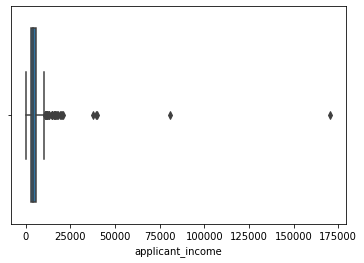

In [31]:
sns.boxplot(x='applicant_income', data=df)

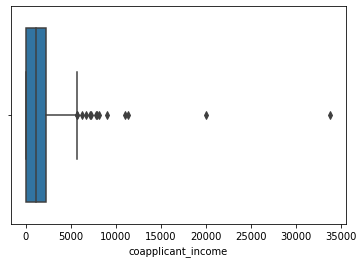

In [32]:
sns.boxplot(x='coapplicant_income', data=df)

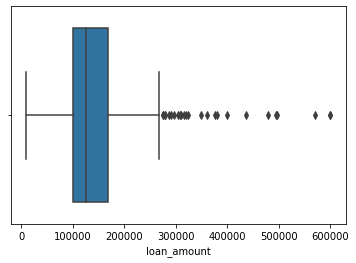

In [33]:
sns.boxplot(x='loan_amount', data=df)

The data looks abnormal due to outliers

In [34]:
print(f'Number of rows before filtering outliers: {len(df)}')

for col in ['applicant_income','coapplicant_income','loan_amount']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers: 429
Number of rows after filtering outliers: 366


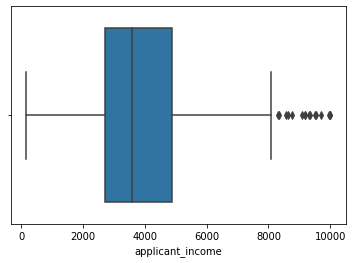

In [35]:
sns.boxplot(x='applicant_income', data=df)

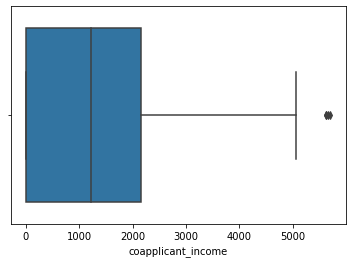

In [36]:
sns.boxplot(x='coapplicant_income', data=df)

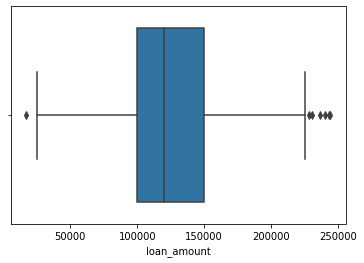

In [37]:
sns.boxplot(x='loan_amount', data=df)

After the data is filtered from the outliers, the distribution of the data becomes more even

## Feature Encoding

In [38]:
for col in df:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column loan_id
LP001002    1
LP002337    1
LP002332    1
LP002328    1
LP002318    1
           ..
LP001693    1
LP001692    1
LP001691    1
LP001682    1
LP002984    1
Name: loan_id, Length: 366, dtype: int64
------------------------------ 

value counts of column birth_date
1990-03-25    2
1982-09-18    2
1986-05-24    2
1991-08-21    2
1984-09-29    2
             ..
1991-02-21    1
1988-11-27    1
1979-11-07    1
1985-12-30    1
1986-12-05    1
Name: birth_date, Length: 354, dtype: int64
------------------------------ 

value counts of column phone_number
6.281142e+11    1
6.281136e+11    1
6.287767e+11    1
6.287765e+11    1
6.281383e+11    1
               ..
6.281123e+10    1
6.285272e+11    1
6.285615e+11    1
6.287715e+10    1
6.281196e+11    1
Name: phone_number, Length: 366, dtype: int64
------------------------------ 

value counts of column gender
Male      299
Female     67
Name: gender, dtype: int64
------------------------------ 

value counts of column 

In [40]:
df1 = df.copy()

cats = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']

for i in cats:
    print(i, 'column', df1[i].unique())

gender column ['Male' 'Female']
married column ['No' 'Yes']
dependents column ['0' '1' '3+' '2']
education column ['Graduate' 'Not Graduate']
self_employed column ['No' 'Yes']
property_type column ['house' 'studio' 'apartment']


Create label encoding for each category

In [41]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_self_employed = {
    'Yes' : 1,
    'No' : 0
}

mapping_education = {
    'Graduate' : 1,
    'Not Graduate' : 0
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+' : 3
}

mapping_property_type = {
    'house' : 0,
    'studio' : 1, 
    'apartment' : 2
}

df['gender'] = df['gender'].map(mapping_gender)
df1['married'] = df1['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['dependents'] = df['dependents'].map(mapping_dependents)
df['self_employed'] = df['self_employed'].map(mapping_self_employed)
df1['property_type'] = df1['property_type'].map(mapping_property_type)

In [42]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,0,No,0,1,0,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,0,Yes,1,1,0,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,0,Yes,0,1,1,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,0,Yes,0,0,0,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,0,No,0,1,0,6000.0,0.0,141000,360,30,1.0,house,APPROVE


# Business Insight

## Analysis of customer interest based on property type

In [44]:
dfgender = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
dfgender.columns = ['gender', 'property_type', 'count']
dfgender

,gender,property_type,count
0,0,apartment,114
1,0,house,98
2,0,studio,87
3,1,apartment,34
4,1,house,16
5,1,studio,17


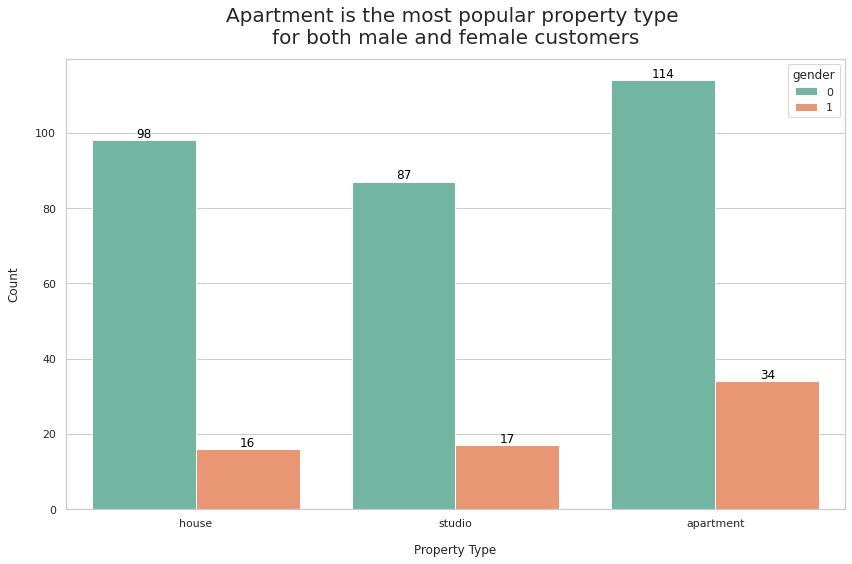

In [46]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(x = 'property_type', data = df, hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)
    
ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type \nfor both male and female customers', pad=15, size=20)
plt.tight_layout() 
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200);

## Analysis of the influence of marital status on the term of the loan 

In [47]:
dfmarried = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
dfmarried.columns = ['married', 'loan_term_year', 'number_of_applicant']
dfmarried

,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,119
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,1


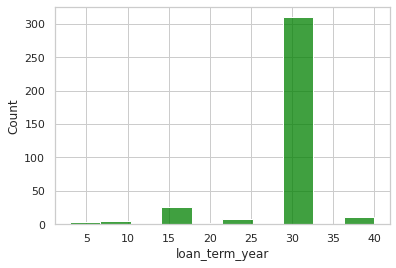

In [48]:
sns.histplot(data=df, x="loan_term_year", bins=10, color="green")

Based on the graph above, we can group the data into several categories:

- `<15`
- `15-25`
- `30`
- `>30`








In [49]:
loan_term_year_group = {}
for i in range(1,41):
    if i<15:
        loan_term_year_group[i]= '<15'
    elif i>=15 and i<=25:
        loan_term_year_group[i]= '15-25'
    elif i==30:
        loan_term_year_group[i]= '30'
    elif i>30:
        loan_term_year_group[i]= '>30'
    else:
        pass
    
dfmarried['loan_term_year_group'] = dfmarried['loan_term_year'].replace(loan_term_year_group)

Text(-0.5, 205, 'Most applicants who are married or not have chosen a loan term of 30 years')

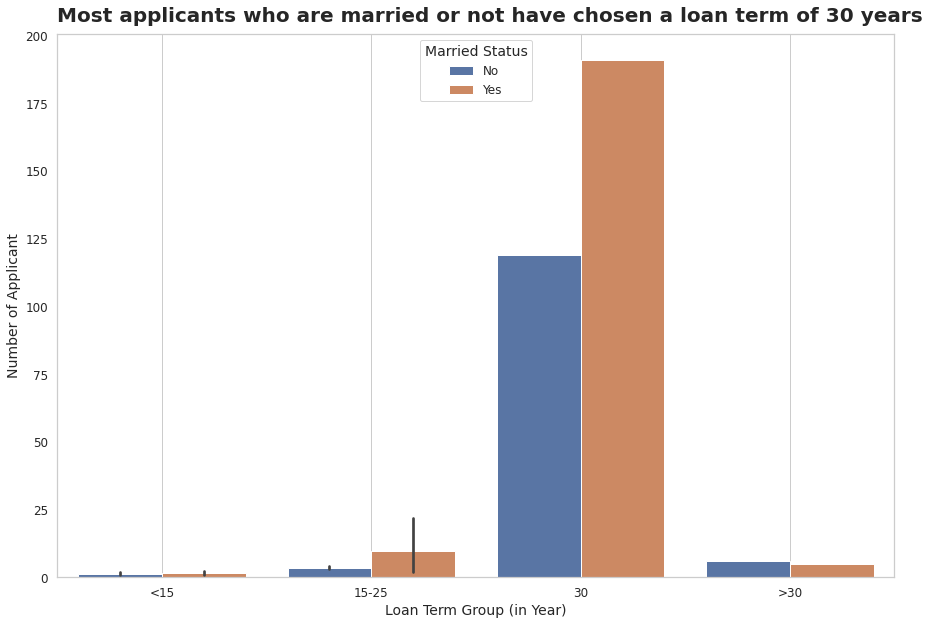

In [50]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='loan_term_year_group', y='number_of_applicant', hue='married', data=dfmarried)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Married Status', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Loan Term Group (in Year)', fontsize=14)
plt.ylabel('Number of Applicant', fontsize=14)
plt.text(x=-0.5, y=205, s="Most applicants who are married or not have chosen a loan term of 30 years", 
         fontsize=20, fontweight='bold') 